In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from neuromation.datasets import BottleLoader
from encoder import DataEncoder
from neuromation import transforms
import torch, sys, os
from torch.utils.data import DataLoader

In [22]:
sys.path.insert(0, os.path.join('exps', 'neuromation'))
import config as cfg

assert torch.cuda.is_available(), 'Error: CUDA not found!'
best_loss = float('inf')
start_epoch = 0
lr = cfg.lr

print('Preparing data..')
train_transform_list = [transforms.ToTensor(), transforms.Normalize(cfg.mean, cfg.std)]
if cfg.scale is not None:
    train_transform_list.insert(0, transforms.Scale(cfg.scale))
train_transform = transforms.Compose(train_transform_list)
val_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(cfg.mean, cfg.std)
])

trainset = BottleLoader('../../data', encoder=DataEncoder(), transform=train_transform)
trainloader = DataLoader(trainset, batch_size=cfg.batch_size, shuffle=True,
                                          num_workers=cfg.num_workers, collate_fn=trainset.collate_fn)

Preparing data..


In [23]:
batch = next(iter(trainloader))

In [24]:
batch

(
 ( 0 , 0 ,.,.) = 
  -59.7942 -60.2216 -59.8765  ...  -60.1157 -60.1157 -60.1157
  -60.3157 -59.7981 -59.7824  ...  -60.1157 -60.1157 -60.1157
  -59.7824 -59.7903 -59.7942  ...  -60.1157 -60.1157 -60.1157
             ...               ⋱              ...            
    0.0000   0.0000   0.0000  ...    0.0000   0.0000   0.0000
    0.0000   0.0000   0.0000  ...    0.0000   0.0000   0.0000
    0.0000   0.0000   0.0000  ...    0.0000   0.0000   0.0000
 
 ( 0 , 1 ,.,.) = 
  -67.4454 -67.8415 -67.5199  ...  -67.8885 -67.8885 -67.8885
  -67.9356 -67.4533 -67.4493  ...  -67.8885 -67.8885 -67.8885
  -67.4454 -67.4415 -67.4415  ...  -67.8885 -67.8885 -67.8885
             ...               ⋱              ...            
    0.0000   0.0000   0.0000  ...    0.0000   0.0000   0.0000
    0.0000   0.0000   0.0000  ...    0.0000   0.0000   0.0000
    0.0000   0.0000   0.0000  ...    0.0000   0.0000   0.0000
 
 ( 0 , 2 ,.,.) = 
  -53.3580 -53.8168 -53.4482  ...  -53.7815 -53.7815 -53.7815
  -53.9031

In [ ]:
change_box_order(boxes,'xywh2xyxy')

In [85]:
import matplotlib.pyplot as plt
import matplotlib as mpl

In [32]:
means = []
stds = []

(3,)

In [44]:
np.mean(stds,0)

array([6.28966094e-27, 5.37032107e-27, 5.30342856e-27])

In [41]:
for p in b.metadata['paths'][8368:]:
    im = np.array(Image.open(p[0]))
    means.append(im.mean(0).mean(0))
    stds.append(((im-means[-1]).mean(0).mean(0))**2)

In [37]:
np.mean(means,0)

array([61.12884587, 69.20663902, 55.06051586])

In [59]:
b.collate_fn([b[1],b[3]])[2].shape

torch.Size([2, 47493])

In [24]:
b.collate_fn([b[1],b[3]])[1].shape

torch.Size([2, 47493, 4])

torch.Size([2, 3, 432, 577])

In [10]:
enc = DataEncoder()


(  0  ,.,.) = 
   0.8887   0.0986  -1.6534      nan
   0.7053   0.0783  -1.8844      nan
   0.5598   0.0621  -2.1155      nan
                 ⋮                  
  -2.4688 -23.9688   0.4261      nan
  -1.9594 -19.0240   0.1950      nan
  -1.5552 -15.0994  -0.0360      nan

(  1  ,.,.) = 
   3.9590   2.5283  -2.9802      nan
   3.1422   2.0067  -3.2113      nan
   2.4940   1.5927  -3.4423      nan
                 ⋮                  
  22.0938  53.7812  -0.9008      nan
  17.5358  42.6862  -1.1318      nan
  13.9182  33.8801  -1.3629      nan
[torch.FloatTensor of size (2,35829,4)]

In [83]:
enc.get_anchor_boxes(torch.Tensor([432,432]))


   3.5000    3.5000  128.0000  256.0000
   3.5000    3.5000  161.2699  322.5398
   3.5000    3.5000  203.1873  406.3747
                   ⋮                    
 370.5000  370.5000   32.0000   16.0000
 370.5000  370.5000   40.3175   20.1587
 370.5000  370.5000   50.7968   25.3984
[torch.FloatTensor of size (35010,4)]

In [58]:
trainset[1]dd

{'boxes': 
   246   186   265   117
   197   284   216   212
   336   284   356   211
   129   283   149   212
   330    90   349    25
   326   186   345   121
   371   374   392   305
   153   282   172   213
   354   282   372   212
   125    92   144    27
   412   283   433   212
    71   374    92   304
   419    90   439    24
   463   374   486   305
   470   185   491   120
   437    90   454    30
    16   187    37   123
   300   284   334   214
   258   374   292   307
   296    90   328    28
   265   282   297   215
    69   283   107   215
   332   374   366   304
   168    92   200    38
    77    92   112    39
     0    93    30    39
   377   260   398   236
   378   284   398   260
   289   186   307   165
   289   165   307   142
   414   185   435   162
   393   357   413   331
   413   163   434   139
   115   356   135   330
   393   374   413   356
   115   374   135   354
   459   260   480   236
   460   284   482   260
    29   260    51   237
    48   356  

In [26]:
35154

torch.Size([10, 262872, 1])

In [60]:
trainset.collate_fn([trainset[0],trainset[1]])

> /root/Desktop/Hackathon/retinanet.pytorch/encoder.py(52)encode()
-> anchor_boxes = self.get_anchor_boxes(input_size)
(Pdb) n
> /root/Desktop/Hackathon/retinanet.pytorch/encoder.py(53)encode()
-> boxes = change_box_order(boxes, 'xyxy2xywh')
(Pdb) boxes

    0   437    31   396
    0   397    33   356
    0   275    29   237
  101   439   134   400
  102   401   134   362
    0   240    30   202
   60   282    92   244
   62   248    93   210
  196   442   227   405
  196   406   226   368
  106    27   131     8
  132    34   157    13
  106    14   132     0
  209    52   235    22
  132    20   158     0
  331   187   346   165
  209    28   234     0
  329   168   344   139
   29   438    71   343
    0   129    19    53
  154   441   183   357
  203   296   225   229
  279   306   319   233
  328   445   371   363
  206   167   230   113
  341   190   363   140
   69   439   101   325
  133   440   161   329
  188   163   211    80
  225   299   250   216
  299   444   326   348
 

BdbQuit: 

> /opt/conda/lib/python3.6/bdb.py(67)dispatch_line()
     65         if self.stop_here(frame) or self.break_here(frame):
     66             self.user_line(frame)
---> 67             if self.quitting: raise BdbQuit
     68         return self.trace_dispatch
     69 

ipdb> q


In [22]:
i, img = 0, torch.zeros_like(b[0][0].mean(2).mean(1))
for d in b:
    img += b[0][0].mean(2).mean(1)
    i+=1
img /= i

KeyboardInterrupt: 

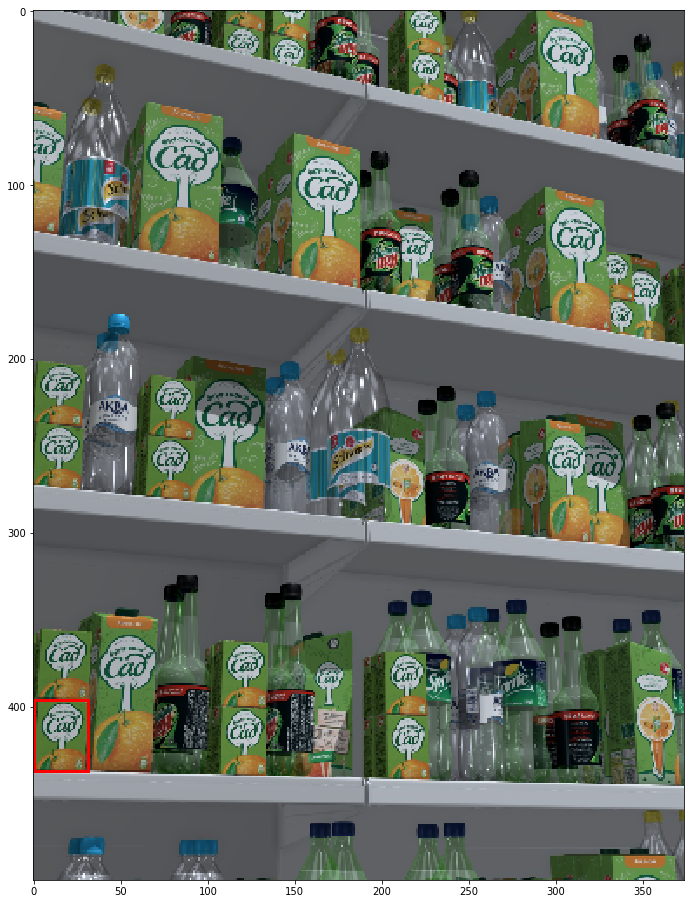

In [108]:
plt.figure(figsize=(16,16))
ax = plt.subplot(111)
data = trainset[0]
boxes = data['boxes']
plt.imshow(data['image'].permute(1,2,0dd))
ax.add_patch(
mpl.patches.Rectangle(boxes[0,(0,3)],boxes[0,2],boxes[0,1],color='red',lw=3, fill=None))

In [96]:
*255

KeyboardInterrupt: 

> /opt/conda/lib/python3.6/site-packages/torch/_tensor_str.py(95)_number_format()
     93     # TODO: use fmod?
     94     for value in tensor:
---> 95         if value != math.ceil(value.item()):
     96             int_mode = False
     97             break

ipdb> c


In [75]:
(b+a)/2


 1008   949
 1007   989
 1009  1110
  906   946
  906   984
 1009  1145
  948  1103
  946  1137
  812   942
  813   979
  905  1348
  879  1342
  905  1359
  802  1329
  879  1356
  685  1190
  802  1352
  687  1212
  974   975
 1014  1275
  855   967
  810  1103
  725  1096
  674   962
  806  1226
  672  1201
  939   984
  877   981
  824  1244
  786  1108
  711   970
  772  1233
  851  1346
  660  1097
  934  1356
  833  1344
  787  1339
  671  1317
  979  1139
  878  1120
  767   973
  762  1106
  758  1225
  697  1313
  661  1309
  847   883
  781   882
  800   978
  907  1255
  742   975
  663   971
  837  1128
  988  1282
  659  1122
  771  1336
  654  1308
  916  1123
  943  1267
  861  1251
  718  1222
  702  1096
  723  1329
[torch.LongTensor of size (62,2)]

In [82]:
b-a


  437   365
  397   323
  275   208
  338   266
  299   228
  240   172
  222   152
  186   117
  246   178
  210   142
  -79  -123
  -98  -144
  -92  -132
 -157  -213
 -112  -158
 -144  -181
 -181  -234
 -161  -205
  409   272
  129    34
  287   174
   93     4
   27   -86
  117    -8
  -39  -117
 -151  -223
  370   224
  307   168
  -25  -131
   74   -34
  145    22
  -66  -172
 -121  -185
  -43  -147
  -58  -102
 -140  -199
 -177  -243
 -258  -351
  250   114
  157    42
  201    72
   53   -56
  -81  -169
 -248  -299
 -271  -341
  337   275
  271   211
  235    93
   42   -55
  176    41
   97   -28
  125   -22
  121   -25
  -93  -149
 -178  -267
 -281  -343
  204    66
   91   -55
   22  -118
  -95  -229
    7  -111
 -204  -325
[torch.LongTensor of size (62,2)]


 1024   929
 1024   969
 1024  1091
  923   927
  922   965
 1024  1126
  964  1084
  962  1118
  828   924
  828   960
  918  1339
  892  1332
  918  1352
  815  1314
  892  1346
  693  1179
  815  1338
  695  1198
  995   928
 1024  1237
  870   925
  821  1070
  745  1060
  696   921
  818  1199
  683  1176
  955   927
  891   926
  836  1203
  799  1067
  725   922
  785  1193
  863  1326
  670  1055
  946  1346
  841  1323
  793  1312
  683  1283
  996  1088
  892  1077
  782   923
  776  1065
  768  1191
  701  1291
  669  1282
  861   866
  795   866
  817   924
  918  1218
  757   923
  676   921
  856  1073
 1009  1230
  668  1103
  786  1306
  658  1281
  942  1080
  970  1221
  887  1207
  744  1181
  723  1058
  747  1293
[torch.LongTensor of size (62,2)]


    0   437    31   396
    0   397    33   356
    0   275    29   237
  101   439   134   400
  102   401   134   362
    0   240    30   202
   60   282    92   244
   62   248    93   210
  196   442   227   405
  196   406   226   368
  106    27   131     8
  132    34   157    13
  106    14   132     0
  209    52   235    22
  132    20   158     0
  331   187   346   165
  209    28   234     0
  329   168   344   139
   29   438    71   343
    0   129    19    53
  154   441   183   357
  203   296   225   229
  279   306   319   233
  328   445   371   363
  206   167   230   113
  341   190   363   140
   69   439   101   325
  133   440   161   329
  188   163   211    80
  225   299   250   216
  299   444   326   348
  239   173   264    92
  161    40   185     0
  354   311   373   226
   78    20   102     0
  183    43   199     0
  231    54   243     0
  341    83   365    14
   28   278    61   175
  132   289   160   202
  242   443   271   343
  248   301   2

In [65]:
trainset[0]['boxes']


    0   437    31   396
    0   397    33   356
    0   275    29   237
  101   439   134   400
  102   401   134   362
    0   240    30   202
   60   282    92   244
   62   248    93   210
  196   442   227   405
  196   406   226   368
  106    27   131     8
  132    34   157    13
  106    14   132     0
  209    52   235    22
  132    20   158     0
  331   187   346   165
  209    28   234     0
  329   168   344   139
   29   438    71   343
    0   129    19    53
  154   441   183   357
  203   296   225   229
  279   306   319   233
  328   445   371   363
  206   167   230   113
  341   190   363   140
   69   439   101   325
  133   440   161   329
  188   163   211    80
  225   299   250   216
  299   444   326   348
  239   173   264    92
  161    40   185     0
  354   311   373   226
   78    20   102     0
  183    43   199     0
  231    54   243     0
  341    83   365    14
   28   278    61   175
  132   289   160   202
  242   443   271   343
  248   301   2

In [66]:
change_box_order(trainset[0]['boxes'], 'xyxy2xywh')


  481   506  1505  1434
  479   526  1503  1494
  483   584  1507  1674
  429   503  1351  1429
  429   522  1351  1486
  482   601  1506  1727
  450   580  1414  1664
  450   597  1412  1715
  383   499  1211  1423
  384   518  1212  1478
  434   689  1352  2027
  421   687  1313  2019
  433   690  1351  2042
  382   687  1196  2001
  420   693  1312  2039
  332   612  1024  1790
  383   697  1197  2035
  333   628  1027  1826
  456   559  1450  1487
  493   695  1517  1931
  406   547  1276  1471
  389   602  1209  1672
  333   603  1077  1663
  305   543  1001  1463
  385   654  1203  1852
  320   638  1002  1814
  446   578  1400  1504
  418   574  1308  1500
  395   685  1231  1887
  375   617  1173  1683
  336   557  1060  1479
  368   678  1152  1870
  408   703  1270  2029
  316   613   986  1667
  449   693  1395  2039
  405   705  1245  2027
  385   710  1177  2022
  318   711  1000  1993
  465   647  1461  1735
  418   626  1310  1702
  362   562  1144  1484
  361   615  11